In [6]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras import layers, models, optimizers

# def gain_impute(df, cat_cols=[], num_cols=[], alpha=100, epochs=10000, batch_size=128):
#     """
#     This function uses Generative Adversarial Imputation Network (GAIN) to impute missing values in a Pandas DataFrame.

#     Parameters:
#     df (pd.DataFrame): The input DataFrame with missing values to be imputed.
#     cat_cols (list): List of column names containing categorical variables.
#     num_cols (list): List of column names containing numerical variables.
#     alpha (float): Hyperparameter to control the balance between the generator loss and the adversarial loss.
#     epochs (int): The number of epochs to train the GAIN model.
#     batch_size (int): The batch size to use during training.

#     Returns:
#     pd.DataFrame: The imputed DataFrame.
#     """
#     # Define generator and discriminator models
#     g = build_generator(num_cols, cat_cols, alpha)
#     d = build_discriminator(num_cols, cat_cols)
#     # Step 1: Convert categorical variables to one-hot encoding
#     for col in cat_cols:
#         df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
#         df = df.drop(col, axis=1)

#     # Step 2: Split data into observed and missing parts
#     missing = df.isna().astype(np.float32)
#     observed = 1 - missing
#     num_missing = int(np.sum(missing.values))

#     # Step 3: Define GAIN model architecture
#     n_features = df.shape[1]
#     g_input = layers.Input(shape=(n_features,))
#     h = layers.Dense(64, activation='relu')(g_input)
#     h = layers.Dense(64, activation='relu')(h)
#     g_output = layers.Dense(n_features)(h)

#     d_input = layers.Input(shape=(n_features,))
#     h = layers.Dense(64, activation='relu')(d_input)
#     h = layers.Dense(64, activation='relu')(h)
#     d_output = layers.Dense(1, activation='sigmoid')(h)

#     gan_input = layers.Input(shape=(n_features,))
#     gan_output = d(g(gan_input))
#     gan = models.Model(gan_input, gan_output)

#     # Step 4: Define GAIN loss functions
#     def generator_loss(y_true, y_pred):
#         observed_mask = tf.cast(observed, tf.float32)
#         gen_loss = tf.reduce_mean(observed_mask * tf.square(y_true - y_pred))
#         return alpha * tf.reduce_mean(tf.abs(tf.subtract(tf.reduce_mean(y_pred), tf.reduce_mean(y_true)))) + gen_loss

#     def discriminator_loss(y_true, y_pred):
#         observed_mask = tf.cast(observed, tf.float32)
#         pos_loss = tf.reduce_mean(observed_mask * tf.keras.losses.binary_crossentropy(tf.ones_like(y_true), y_true))
#         neg_loss = tf.reduce_mean(missing * tf.keras.losses.binary_crossentropy(tf.zeros_like(y_true), y_true))
#         return pos_loss + neg_loss

#     # Step 5: Compile GAIN model
#     g = models.Model(g_input, g_output)
#     d = models.Model(d_input, d_output)
#     gan.compile(optimizer=optimizers.Adam(lr=0.001), loss=discriminator_loss)
#     g.compile(optimizer=optimizers.Adam(lr=0.001), loss=generator_loss)

#     # Step 6: Train GAIN model
#     for epoch in range(epochs):
#         idx = np.random.randint(0, df.shape[0], batch_size)
#         # Select a random batch of observed data and missing data
#         observed_batch = observed.iloc[idx]
#         missing_batch = missing.iloc[idx]

#         # Use generator to generate imputed data for missing batch
#         generated_data = g.predict(missing_batch * observed_batch)

#         # Mask the observed data to keep it fixed and calculate adversarial loss
#         observed_mask = tf.cast(observed_batch, tf.float32)
#         d_loss = d.train_on_batch(observed_batch, observed_mask)
#         d_loss += d.train_on_batch(generated_data, missing_batch)

#         # Train the generator to minimize generator loss
#         g_loss = gan.train_on_batch(missing_batch * observed_batch, observed_mask)
#         if epoch % 1000 == 0:
#             print(f"Epoch {epoch}/{epochs}: Generator loss: {g_loss:.4f}, Adversarial loss: {d_loss:.4f}")

#     # Step 7: Use generator to impute missing values in DataFrame
#     imputed_data = g.predict(missing * observed) * missing
#     imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

#     # Step 8: Split one-hot encoded columns back into categorical variables
#     for col in cat_cols:
#         prefix = col + '_'
#         cat_cols_one_hot = [c for c in imputed_df.columns if c.startswith(prefix)]
#         imputed_df[col] = imputed_df[cat_cols_one_hot].idxmax(axis=1).str.replace(prefix, '')
#         imputed_df = imputed_df.drop(cat_cols_one_hot, axis=1)

#     # Step 9: Return the imputed DataFrame
#     return imputed_df


In [128]:
from sklearn.datasets import load_iris

data = load_iris()
import pandas as pd
import numpy as np

data1 = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])
import pandas as pd
import numpy as np

def drop_random_data(df, column, n, distribution='uniform', **kwargs):
    np.random.seed(123)
    #'uniform', 'standard', 'normal', or 'poisson'. ? 
    if distribution == 'uniform':
        low = 0
        high = df.shape[0] - 1
        indices = np.random.randint(low, high, size=n)

    elif distribution == 'standard':
        # Use a standard normal distribution to generate random indices
        mean = df[column].mean()
        std = df[column].std()

        indices = np.random.normal(loc=mean, scale=std, size=n)
        # Round the indices to the nearest integer

        indices = np.rint(indices).astype(int)

        # Clip the indices to be within the range of valid indices
        indices = np.clip(indices, 0, df.shape[0] - 1)

    else:
        raise ValueError("Invalid distribution: must be 'uniform' or 'standard'.")

    # Set the specified column values to NaN at the selected indices
    df.at[indices, column] = np.nan

    return df

def apply_random_missing_for_all(df,n):
    for each in df.columns:
        df = drop_random_data(df, each, n, distribution='standard')
    return df
# new_df = apply_random_missing_for_all(data1,10)
from sklearn.preprocessing import MinMaxScaler

def apply_normalize(df):
    scaler = MinMaxScaler()
    for each in df.columns:
        df[f'{each}'] = scaler.fit_transform(df[[each]])
    return df
# n_df = apply_normalize(new_df)
# n_df

In [15]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# import tensorflow_addons as tfa
# from sklearn.preprocessing import MinMaxScaler

# def gain_impute(df, batch_size=128, epochs=1000, hint_rate=0.9):
#     """
#     Impute missing data using Generative Adversarial Imputation Network (GAIN).
#     :param df: pandas DataFrame with missing values.
#     :param batch_size: batch size for training.
#     :param epochs: number of epochs for training.
#     :param hint_rate: hint rate for generating hints.
#     :return: pandas DataFrame with imputed values.
#     """
#     # Convert dataframe to numpy array
#     data = df.values
    
#     # Scale data to [-1, 1]
#     scaler = MinMaxScaler(feature_range=(-1, 1))
#     data = scaler.fit_transform(data)
    
#     # Split into observed and missing data
#     observed_data = np.copy(data)
#     missing_mask = np.isnan(data)
#     missing_data = np.copy(data)
#     missing_data[missing_mask] = 0
    
#     # Define generator network
#     generator = tf.keras.Sequential([
#         tf.keras.layers.Dense(128, input_shape=(data.shape[1],)),
#         tf.keras.layers.LeakyReLU(alpha=0.2),
#         tf.keras.layers.Dense(256),
#         tf.keras.layers.LeakyReLU(alpha=0.2),
#         tf.keras.layers.Dense(data.shape[1])
#     ])
    
#     # Define discriminator network
#     discriminator = tf.keras.Sequential([
#         tf.keras.layers.Dense(256, input_shape=(data.shape[1],)),
#         tf.keras.layers.LeakyReLU(alpha=0.2),
#         tf.keras.layers.Dropout(0.3),
#         tf.keras.layers.Dense(128),
#         tf.keras.layers.LeakyReLU(alpha=0.2),
#         tf.keras.layers.Dropout(0.3),
#         tf.keras.layers.Dense(1, activation='sigmoid')
#     ])
    
#     # Define hint generator network
#     hint_generator = tf.keras.Sequential([
#         tf.keras.layers.Dense(128, input_shape=(data.shape[1],)),
#         tf.keras.layers.LeakyReLU(alpha=0.2),
#         tf.keras.layers.Dense(256),
#         tf.keras.layers.LeakyReLU(alpha=0.2),
#         tf.keras.layers.Dense(data.shape[1])
#     ])
    
#     # Define loss functions
#     bce_loss = tf.keras.losses.BinaryCrossentropy()
#     mse_loss = tf.keras.losses.MeanSquaredError()
    
#     # Define optimizers
#     generator_optimizer = tf.keras.optimizers.Adam(0.001)
#     discriminator_optimizer = tf.keras.optimizers.Adam(0.001)
#     hint_generator_optimizer = tf.keras.optimizers.Adam(0.001)
    
#     for epoch in range(epochs):
#         # Create batches of observed and missing data
#         indices = np.arange(data.shape[0])
#         np.random.shuffle(indices)
#         for i in range(0, data.shape[0], batch_size):
#             batch_indices = indices[i:i+batch_size]
#             batch_observed = observed_data[batch_indices]
#             batch_missing = missing_data[batch_indices]
#             batch_missing_mask = missing_mask[batch_indices]
            
#             # Generate hints
#             batch_hints = batch_missing_mask * np.random.binomial(1, hint_rate, size=batch_missing.shape)
#             batch_hints = batch_hints.astype('float32')
            
#             # Train discriminator
#             with tf.GradientTape() as disc_tape:
#                 # Generate fake data
#                 fake_data = generator(batch_observed)
#                 # Concatenate fake data and hints
#                 data_hints = batch_hints * fake_data + (1 - batch_hints) * batch_observed
#                 # Compute discriminator loss
#                 disc_loss = bce_loss(discriminator(data_hints), batch_hints)
#             disc_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
#             discriminator_optimizer.apply_gradients(zip(disc_gradients, discriminator.trainable_variables))
            
#             # Train generator
#             with tf.GradientTape() as gen_tape:
#                 # Generate fake data
#                 fake_data = generator(batch_observed)
#                 # Concatenate fake data and hints
#                 data_hints = batch_hints * fake_data + (1 - batch_hints) * batch_observed
#                 # Compute generator loss
#                 gen_loss = 0.5 * mse_loss(batch_hints * fake_data, batch_hints * batch_missing) + \
#                            0.5 * mse_loss((1 - batch_hints) * fake_data, (1 - batch_hints) * batch_observed) + \
#                            0.5 * bce_loss(discriminator(data_hints), batch_hints)
#             gen_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
#             generator_optimizer.apply_gradients(zip(gen_gradients, generator.trainable_variables))
            
#             # Train hint generator
#             with tf.GradientTape() as hint_tape:
#                 # Generate hints
#                 hints = hint_generator(batch_missing)
#                 # Compute hint generator loss
#                 hint_loss = mse_loss(batch_hints, hints)
#             hint_gradients = hint_tape.gradient(hint_loss, hint_generator.trainable_variables)
#             hint_generator_optimizer.apply_gradients(zip(hint_gradients, hint_generator.trainable_variables))
            
#             # Update observed and missing data
#             observed_data[batch_indices] = batch_hints * fake_data + (1 - batch_hints) * batch_observed
#             missing_data[batch_indices] = batch_hints * fake_data + (1 - batch_hints) * batch_missing
    
#     # Inverse scaling
#     observed_data = scaler.inverse_transform(observed_data)
    
#     # Create imputed dataframe
#     imputed_df = pd.DataFrame(observed_data, columns=df.columns)
    
#     return imputed_df


In [129]:
from keras.layers import Input,Dense,Concatenate
from keras.models import Model
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from sklearn.preprocessing import MinMaxScaler

def build_generator(input_size):
    """Builds and compiles the generator model.

    Args:
        input_size (int): The number of input features.

    Returns:
        A compiled Keras model object.
    """
    # Define input layers
    input_missing = Input(shape=(input_size,))
    input_hints = Input(shape=(input_size,))

    # Define hidden layers
    x = Concatenate()([input_missing, input_hints])
    x = Dense(256, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    output_imputed = Dense(input_size, activation='tanh')(x)

    # Define generator model
    generator = Model(inputs=[input_missing, input_hints], outputs=output_imputed)

    # Compile generator model
    generator.compile(loss='binary_crossentropy', optimizer='adam')

    return generator


def build_discriminator(input_size):
    """Builds and compiles the discriminator model.

    Args:
        input_size (int): The number of input features.

    Returns:
        A compiled Keras model object.
    """
    # Define input layer
    input_data = Input(shape=(input_size,))

    # Define hidden layers
    x = Dense(256, activation='relu')(input_data)
    x = Dense(512, activation='relu')(x)
    x = Dense(1024, activation='relu')(x)
    output_prob = Dense(1, activation='sigmoid')(x)

    # Define discriminator model
    discriminator = Model(inputs=input_data, outputs=output_prob)

    # Compile discriminator model
    discriminator.compile(loss='binary_crossentropy', optimizer='adam')

    return discriminator


In [113]:
# import keras.backend as K

# def mse_loss(y_true, y_pred):
#     return K.mean(K.square(y_true - y_pred))

# def bce_loss(y_true, y_pred):
#     epsilon = K.epsilon()
#     y_pred = K.clip(y_pred, epsilon, 1 - epsilon)
#     return -K.mean(y_true * K.log(y_pred) + (1 - y_true) * K.log(1 - y_pred))


In [141]:
from keras.losses import mse as mse_loss, binary_crossentropy as bce_loss

def gain_impute(data, hint_probability=0.9, batch_size=64, epochs=10000):
    # Convert input data to NumPy array
    tmp = data.columns
    data = data.values.astype('float32')

    # Create mask of missing values
    mask = np.isnan(data)
    # mask = data.isna().to_numpy()

    # Create generator and discriminator models
    generator = build_generator(data.shape[1])
    discriminator = build_discriminator(data.shape[1])

    # Compile discriminator model
    discriminator.compile(loss='binary_crossentropy', optimizer='adam')

    # Create scaler object for data scaling and unscaling
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler.fit(data)

    # Scale data to range [-1, 1]
    data_scaled = scaler.transform(data)

    # Train generator and discriminator models
    for epoch in range(epochs):
        # Create batches of observed and missing data
        indices = np.arange(data.shape[0])
        np.random.shuffle(indices)
        for i in range(0, data.shape[0], batch_size):
            batch_indices = indices[i:i + batch_size]
            batch_missing = data_scaled[batch_indices] * mask[batch_indices]
            batch_observed = data_scaled[batch_indices] * (1 - mask[batch_indices])
            batch_hints = None
            batch_hints = (np.random.random(batch_missing.shape) < hint_probability).astype('float32')
            batch_hints = tf.cast(batch_hints, tf.float32)
            # print(batch_hints.dtype)
            
            # Generate fake data using generator model
            #print('-----------',batch_missing,'========',batch_hints)
            fake_data = generator.predict([batch_missing, batch_hints])
            data_hints = batch_missing * (1 - batch_hints) + fake_data * batch_hints
            
            # Train discriminator model
            discriminator.train_on_batch(batch_observed, np.ones((len(batch_observed), 1)))
            discriminator.train_on_batch(fake_data, np.zeros((len(fake_data), 1)))
            discriminator.train_on_batch(data_hints, batch_hints)

            # Train generator model
            gen_loss = 0.5 * mse_loss(batch_hints * fake_data,batch_hints * data_scaled[batch_indices]) + \
                       0.5 * mse_loss((1 - batch_hints) * fake_data, (1 - batch_hints) * batch_observed) + \
                       0.5 * bce_loss(discriminator(data_hints), tf.cast(batch_hints, dtype='float32'))
            generator.train_on_batch([batch_missing, batch_hints], batch_observed)
            
            # Test the generator model by generating some data
            test_missing = np.zeros((10, data.shape[1]), dtype='float32')
            test_hints = np.ones((10, data.shape[1]), dtype='float32')
            test_data = generator.predict([test_missing, test_hints])
            #print(test_data)
            
    # Generate imputed data using generator model
    imputed_data = generator.predict([data_scaled * mask, np.ones_like(data_scaled)])
    #print([data_scaled * mask])
    #print(imputed_data)
    # Unscale imputed data to original range
    imputed_data = scaler.inverse_transform(imputed_data)

    # Fill in missing values with imputed data
    data_filled = data.copy()
    # data_filled[mask] = imputed_data[mask]
    data[mask] = imputed_data[mask]
    data.loc[mask] = imputed_data[mask]
    data = data.fillna(data.mean())

    # Convert imputed data to pandas DataFrame
    imputed_df = pd.DataFrame(data_filled, columns=tmp)
    
    # Assuming 'generator' is the generator model object
    generator_weights = generator.get_weights()
    #rint('------------------',generator_weights)

    return imputed_df,generator


In [131]:
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [132]:
n_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,NaN,NaN,NaN
1,0.166667,0.416667,NaN,NaN,NaN
2,0.111111,NaN,NaN,NaN,NaN
3,0.083333,NaN,NaN,0.041667,0.0
4,NaN,NaN,NaN,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0
146,0.555556,0.208333,0.677966,0.750000,1.0
147,0.611111,0.416667,0.711864,0.791667,1.0
148,0.527778,0.583333,0.745763,0.916667,1.0


In [142]:
imputed_data, generator = gain_impute(data1, hint_probability=0.1, batch_size=128)

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


4/4 [==============================] - 0s 4ms/step


2023-02-16 06:30:18.355638: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 4ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


2023-02-16 06:39:37.926112: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


5/5 [==============================] - 0s 3ms/step


AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [134]:
model.get_weights()

[array([[-0.15014467, -0.11958051, -0.0211087 , ..., -0.04083274,
          0.02442889, -0.09893034],
        [-0.0316351 ,  0.11681843,  0.02030669, ..., -0.01685438,
         -0.06451382,  0.08141744],
        [ 0.0289607 ,  0.03753851, -0.09793057, ...,  0.03217196,
          0.09419355, -0.07036313],
        ...,
        [-0.11100388,  0.01778901,  0.1123833 , ..., -0.05024604,
          0.04874308, -0.12232688],
        [ 0.07202023,  0.10015038,  0.14319904, ..., -0.02506178,
          0.05492853,  0.1013444 ],
        [-0.12017498,  0.0257923 , -0.10314383, ..., -0.13809218,
         -0.13450496,  0.11509396]], dtype=float32),
 array([ 0.0000000e+00,  5.1803300e-03, -4.6377988e-03,  4.9015172e-03,
        -5.0625671e-03,  5.7177069e-03, -4.0191486e-03, -4.8027164e-03,
         5.7832240e-03,  4.2785131e-03, -4.8477482e-03,  4.8895022e-03,
         4.0476811e-03,  4.1355444e-03, -4.4228132e-03,  4.3385965e-03,
        -5.9785973e-03, -3.5512510e-03, -3.2964172e-03,  5.1201284e-03

In [186]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assume data1 is your training data that has no missing values
# data1 = pd.read_csv('your_data_file.csv')

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data1)

# new_data = pd.DataFrame({'sepal length (cm)': [5.1], 'sepal width (cm)': [3.5], 
#                          'petal length (cm)': [1.4], 'pental width (cm)': [0], 'target': [0.0]})
new_data = pd.DataFrame(data=[[5.1,3.5,1.4,0,0.0]],
                       columns = data1.columns)
# Fill in missing value with the mean of the same column
new_data = new_data.fillna(new_data.mean())

new_data_scaled = scaler.transform(new_data.values)
hints = (np.random.random(new_data_scaled.shape) < 0.9).astype('float32')
# print('----',hints)
# print('+++++',new_data_scaled)

imputed_data_scaled = model.predict([new_data_scaled, hints])
imputed_data = scaler.inverse_transform(imputed_data_scaled)

print(imputed_data[0][3])


1/1 [==============================] - 0s 19ms/step
0.64843327


/home/pn7hao/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [188]:
new_df = apply_random_missing_for_all(data1,10)
n_df = apply_normalize(new_df)

In [196]:
import pandas as pd
import numpy as np

# create a sample DataFrame with NaN values
df = pd.DataFrame({'A': [np.nan, np.nan, 3],
                   'B': [np.nan, np.nan, 6],
                   'C': [7, 8, np.nan]})

# get the index of the NaN value in the first row of the DataFrame
index = np.where(df.loc[0].isna() == True)[0]

print(index)  # output: 0


[0 1]


In [204]:
df.loc[0].isna().any()

True

In [217]:
def fill_nan(df):
    for i in range(len(df)):
        if df.loc[i].isna().any() == True:
            index = np.where(df.loc[i].isna()==True)[0]
            for each in index:
                df.loc[i][each] = 0
            for each in index : 
                scaler = MinMaxScaler(feature_range=(-1, 1))
                scaler.fit(data1)
                df.loc[i][each] = 0
                new_data = pd.DataFrame(data=[df.loc[i]], columns = df.columns)

                # Fill in missing value with the mean of the same column
                new_data = new_data.fillna(new_data.mean())

                new_data_scaled = scaler.transform(new_data.values)
                hints = (np.random.random(new_data_scaled.shape) < 0.9).astype('float32')
                imputed_data_scaled = model.predict([new_data_scaled, hints])
                imputed_data = scaler.inverse_transform(imputed_data_scaled)

                df.loc[i][each] = imputed_data[0][each]
                print(imputed_data[0][each])
        else:
            break 
    return df

In [218]:
n_df_imputed = fill_nan(n_df)

1/1 [==============================] - 0s 19ms/step
0.023248136
1/1 [==============================] - 0s 18ms/step
0.23022786
1/1 [==============================] - 0s 17ms/step


/home/pn7hao/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/pn7hao/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/pn7hao/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/pn7hao/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0.09823465
1/1 [==============================] - 0s 21ms/step
0.018519998
1/1 [==============================] - 0s 19ms/step
0.24541545
1/1 [==============================] - 0s 17ms/step
0.035752147
1/1 [==============================] - 0s 17ms/step
0.048456162
1/1 [==============================] - 0s 15ms/step
0.019217342


/home/pn7hao/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/pn7hao/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/pn7hao/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/pn7hao/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/pn7hao/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 15ms/step
0.26826063
1/1 [==============================] - 0s 17ms/step
0.05676508
1/1 [==============================] - 0s 17ms/step
0.030469954
1/1 [==============================] - 0s 17ms/step
0.019741267


/home/pn7hao/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/pn7hao/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/pn7hao/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/pn7hao/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
0.31394464
1/1 [==============================] - 0s 18ms/step
0.033065468
1/1 [==============================] - 0s 16ms/step
0.020227969


/home/pn7hao/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/pn7hao/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [219]:
n_df_imputed

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.023248,0.230228,0.098235
1,0.166667,0.416667,0.018520,0.245415,0.035752
2,0.111111,0.048456,0.019217,0.268261,0.056765
3,0.083333,0.030470,0.019741,0.041667,0.000000
4,0.313945,0.033065,0.020228,0.041667,0.000000
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.000000
146,0.555556,0.208333,0.677966,0.750000,1.000000
147,0.611111,0.416667,0.711864,0.791667,1.000000
148,0.527778,0.583333,0.745763,0.916667,1.000000


<AxesSubplot:>

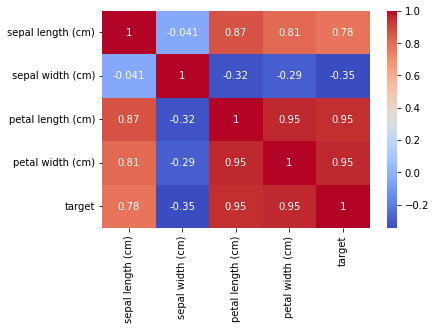

In [220]:
import seaborn as sns
import pandas as pd

corr_matrix = n_df_imputed.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

In [95]:
model.summary()

Model: "model_26"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_40 (InputLayer)          [(None, 5)]          0           []                               
                                                                                                  
 input_41 (InputLayer)          [(None, 5)]          0           []                               
                                                                                                  
 concatenate_13 (Concatenate)   (None, 10)           0           ['input_40[0][0]',               
                                                                  'input_41[0][0]']               
                                                                                                  
 dense_130 (Dense)              (None, 256)          2816        ['concatenate_13[0][0]']  

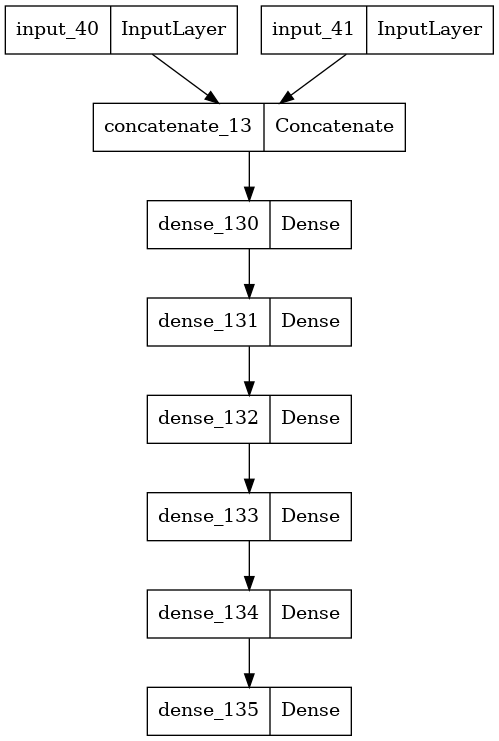

In [96]:
tf.keras.utils.plot_model(model)

In [1]:
distance : R2 norm -> base 

SyntaxError: invalid syntax (2553503185.py, line 1)

In [ ]:
()